## Rod Cantilever Example

In [1]:
import numpy as np

import dismech

b = 0.02
h = 0.001

geom = dismech.GeomParams(rod_r0=0.001,
                          shell_h=0)

material = dismech.Material(density=1200,
                            youngs_rod=2e6,
                            youngs_shell=0,
                            poisson_rod=0.5,
                            poisson_shell=0)

static_2d_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=True,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=False,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=100,
                                  total_time=3.0,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
#env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
env.add_force('selfContact', delta=1e-3, h=2e-3, kc=5e1)
#env.set_static()   

geo = dismech.Geometry.from_txt('input.txt')

robot = dismech.SoftRobot(geom, material, geo, static_2d_sim, env)

u = robot.state.u
u[8] = -0.1
u[11] = -0.1

### Time Stepping

As we are performing a static simulation, we must change gravity for each time step.

In [2]:
stepper = dismech.ImplicitEulerTimeStepper(robot)

robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

delta: 0.5
h: 1.0
K1: 30.0
scale:  500.0
kc:  50.0
upper limit for quadratic: 1.5
upper limit for smooth: 2.5
[50.]
[False]
[]
0.02665729762895019
2.219665920145957e-17
current_time:  0.01
[49.5]
[False]
[]
0.026657297628950215
0.0
current_time:  0.02
[49.]
[False]
[]
0.026657297628950215
0.0
current_time:  0.03
[48.5]
[False]
[]
0.026657297628950215
0.0
current_time:  0.04
[48.]
[False]
[]
0.026657297628950215
0.0
current_time:  0.05
[47.5]
[False]
[]
0.026657297628950215
0.0
current_time:  0.06
[47.]
[False]
[]
0.026657297628950215
0.0
current_time:  0.07
[46.5]
[False]
[]
0.026657297628950215
0.0
current_time:  0.08
[46.]
[False]
[]
0.026657297628950215
0.0
current_time:  0.09
[45.5]
[False]
[]
0.026657297628950215
0.0
current_time:  0.1
[45.]
[False]
[]
0.026657297628950215
0.0
current_time:  0.11
[44.5]
[False]
[]
0.026657297628950215
0.0
current_time:  0.12
[44.]
[False]
[]
0.026657297628950215
0.0
current_time:  0.13
[43.5]
[False]
[]
0.026657297628950215
0.0
current_time:  0.14

In [3]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Rod Cantilever (N=51)')

fig = dismech.get_interactive_animation_plotly(robot, t[::2], qs[::2], options)
fig.show()

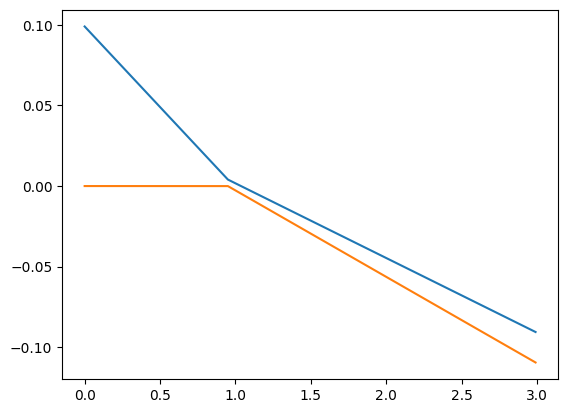

In [4]:
import matplotlib.pyplot as plt
plt.plot(t, qs[:, 8])
plt.plot(t, qs[:, 2])
plt.show()

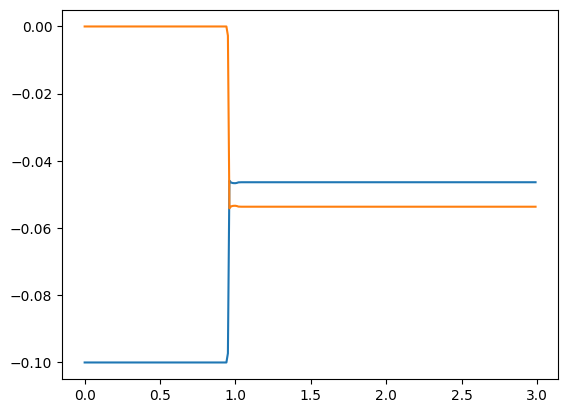

In [5]:
us = np.stack([robot.state.u for robot in robots])
plt.plot(t, us[:, 8])
plt.plot(t, us[:, 2])
plt.show()

In [6]:
robot.sim_params.dt * 

SyntaxError: invalid syntax (480735588.py, line 1)